In [150]:
import pandas as pd

In [151]:
import numpy as np

In [152]:
import matplotlib.pyplot as plt

In [153]:
import seaborn as sns

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [155]:
from sklearn import metrics


In [156]:
from sklearn.svm import SVC

In [157]:
import xgboost as xgb

In [158]:


from xgboost import XGBClassifier

In [159]:
from sklearn.metrics import accuracy_score,f1_score

In [160]:
akeed=pd.read_csv("/Users/da-m1-09/Akeed Restaurant/Final_akeed.csv")

In [161]:
akeed

,Unnamed: 0,vendor_id,vname,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,is_akeed_delivering,discount_percentage,status_x,verified_x,rank,vendor_rating_x,vendor_tag,vendor_tag_name,device_type,akeed_order_id,customer_id,item_count,grand_total,payment_mode,vendor_discount_amount,is_favorite,is_rated,driver_rating,deliverydistance,preparationtime,created_at_y,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR,location_number,location_type,latitude_y,longitude_y,gender,status_y,verified_y
0,0,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,163267.0,TBOTOCJ,1.0,7.3,1,0.0,No,No,0.0,0.00,44.010993,2019-08-01 06:11:15,0,Home,TBOTOCJ X 0 X 4,0,Home,-0.603303,-78.519610,male,1,1
1,1,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,163267.0,TBOTOCJ,1.0,7.3,1,0.0,No,No,0.0,0.00,44.010993,2019-08-01 06:11:15,0,Home,TBOTOCJ X 0 X 4,1,Home,-0.603823,0.752779,male,1,1
2,2,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,124595.0,TBOTOCJ,1.0,15.5,1,0.0,No,No,0.0,0.00,44.010993,2019-06-01 13:57:14,0,Home,TBOTOCJ X 0 X 4,0,Home,-0.603303,-78.519610,male,1,1
3,3,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,124595.0,TBOTOCJ,1.0,15.5,1,0.0,No,No,0.0,0.00,44.010993,2019-06-01 13:57:14,0,Home,TBOTOCJ X 0 X 4,1,Home,-0.603823,0.752779,male,1,1
4,4,188,Avaveo,118786,-0.405660,0.644401,Restaurants,2,0.7,8,1,11:59AM-10:45PM,14,Yes,0,1,1,11,4.6,"34,27,15,24,16","Italian,Pasta,Pizzas,Salads,Sandwiches",3,124974.0,TBOTOCJ,1.0,13.0,1,0.0,No,No,0.0,0.00,44.010993,2019-06-02 17:07:56,0,Home,TBOTOCJ X 0 X 188,0,Home,-0.603303,-78.519610,male,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361429,381994,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,411899.0,BGUXDWX,7.0,55.5,2,0.0,No,No,0.0,7.35,45.000000,2020-02-28 13:57:28,0,Home,BGUXDWX X 0 X 681,0,Home,0.182037,0.050900,female,1,1
361430,381995,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,411910.0,VUBOW8L,1.0,8.4,1,0.0,No,No,0.0,10.34,40.000000,2020-02-28 14:04:50,0,Home,VUBOW8L X 0 X 681,0,Home,-1.524390,-0.024741,male,1,0
361431,381996,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,412059.0,N5MKYBU,1.0,8.4,1,0.0,No,No,0.0,1.93,30.000000,2020-02-28 15:11:59,0,Home,N5MKYBU X 0 X 681,0,Home,-0.540456,0.059288,male,1,1
361432,381997,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,413226.0,2UYA2WP,3.0,12.8,1,0.0,No,Yes,2.0,6.80,40.000000,2020-02-28 22:39:58,0,Home,2UYA2WP X 0 X 681,0,Home,-0.557269,0.172343,male,1,1


In [162]:
test=pd.read_csv("/Users/da-m1-09/Downloads/test_customers.csv")

In [163]:
orders=pd.read_csv("/Users/da-m1-09/Downloads/orders.csv")
orders

/var/folders/59/nzz8v2013tsby595_yj460fr0000gn/T/ipykernel_6549/3628840373.py:1: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders=pd.read_csv("/Users/da-m1-09/Downloads/orders.csv")


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.00,NaN,2019-08-01 04:03:00,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,415507.0,L6LFY6H,1.0,13.3,2,NaN,0.0,0.0,No,No,NaN,0.0,1.75,40.0,NaN,2020-02-29 23:48:47,2020-02-29 23:59:21,2020-03-01 00:02:10,2020-03-01 00:22:53,2020-03-01 00:29:42,NaN,67,2020-02-29 23:47:59,0,NaN,L6LFY6H X 0 X 67
135299,415508.0,2GMMVGI,3.0,9.5,1,NaN,0.0,0.0,No,Yes,5.0,4.0,12.81,60.0,NaN,2020-02-29 23:49:50,2020-03-01 00:19:46,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,0,Work,2GMMVGI X 0 X 79
135300,415510.0,LYTAAV0,4.0,18.2,2,NaN,0.0,0.0,No,No,NaN,0.0,11.15,45.0,NaN,2020-02-29 23:49:16,2020-03-01 00:04:28,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,2,Other,LYTAAV0 X 2 X 28
135301,415512.0,NEV9A5D,3.0,7.7,1,NUE5BZAA7,0.0,0.0,No,No,NaN,0.0,2.29,35.0,NaN,2020-02-29 23:54:38,2020-03-01 00:06:14,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaN,841,2020-02-29 23:50:10,0,NaN,NEV9A5D X 0 X 841


In [164]:
ff = orders['CID X LOC_NUM X VENDOR']
ff

0         92PEE24 X 0 X 105
1         QS68UD8 X 0 X 294
2          MB7VY5F X 0 X 83
3          KDJ951Y X 0 X 90
4          BAL0RVT X 0 X 83
                ...        
135298     L6LFY6H X 0 X 67
135299     2GMMVGI X 0 X 79
135300     LYTAAV0 X 2 X 28
135301    NEV9A5D X 0 X 841
135302     77KCRC1 X 4 X 79
Name: CID X LOC_NUM X VENDOR, Length: 135303, dtype: object

In [165]:
akeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361434 entries, 0 to 361433
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              361434 non-null  int64  
 1   vendor_id               361434 non-null  int64  
 2   vname                   361434 non-null  object 
 3   authentication_id       361434 non-null  int64  
 4   latitude_x              361434 non-null  float64
 5   longitude_x             361434 non-null  float64
 6   vendor_category_en      361434 non-null  object 
 7   vendor_category_id      361434 non-null  int64  
 8   delivery_charge         361434 non-null  float64
 9   serving_distance        361434 non-null  int64  
 10  is_open                 361434 non-null  int64  
 11  OpeningTime             361434 non-null  object 
 12  prepration_time         361434 non-null  int64  
 13  is_akeed_delivering     361434 non-null  object 
 14  discount_percentage 

In [166]:
akeed.columns

Index(['Unnamed: 0', 'vendor_id', 'vname', 'authentication_id', 'latitude_x',
       'longitude_x', 'vendor_category_en', 'vendor_category_id',
       'delivery_charge', 'serving_distance', 'is_open', 'OpeningTime',
       'prepration_time', 'is_akeed_delivering', 'discount_percentage',
       'status_x', 'verified_x', 'rank', 'vendor_rating_x', 'vendor_tag',
       'vendor_tag_name', 'device_type', 'akeed_order_id', 'customer_id',
       'item_count', 'grand_total', 'payment_mode', 'vendor_discount_amount',
       'is_favorite', 'is_rated', 'driver_rating', 'deliverydistance',
       'preparationtime', 'created_at_y', 'LOCATION_NUMBER', 'LOCATION_TYPE',
       'CID X LOC_NUM X VENDOR', 'location_number', 'location_type',
       'latitude_y', 'longitude_y', 'gender', 'status_y', 'verified_y'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


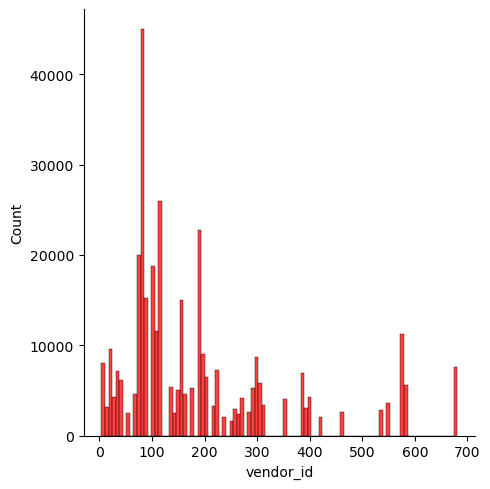

In [167]:
sns.displot(akeed['vendor_id'], kde=False, color='red', bins=100)

In [168]:
pd.set_option('display.max_columns', None)

In [169]:
akeed

,Unnamed: 0,vendor_id,vname,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,is_akeed_delivering,discount_percentage,status_x,verified_x,rank,vendor_rating_x,vendor_tag,vendor_tag_name,device_type,akeed_order_id,customer_id,item_count,grand_total,payment_mode,vendor_discount_amount,is_favorite,is_rated,driver_rating,deliverydistance,preparationtime,created_at_y,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR,location_number,location_type,latitude_y,longitude_y,gender,status_y,verified_y
0,0,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,163267.0,TBOTOCJ,1.0,7.3,1,0.0,No,No,0.0,0.00,44.010993,2019-08-01 06:11:15,0,Home,TBOTOCJ X 0 X 4,0,Home,-0.603303,-78.519610,male,1,1
1,1,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,163267.0,TBOTOCJ,1.0,7.3,1,0.0,No,No,0.0,0.00,44.010993,2019-08-01 06:11:15,0,Home,TBOTOCJ X 0 X 4,1,Home,-0.603823,0.752779,male,1,1
2,2,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,124595.0,TBOTOCJ,1.0,15.5,1,0.0,No,No,0.0,0.00,44.010993,2019-06-01 13:57:14,0,Home,TBOTOCJ X 0 X 4,0,Home,-0.603303,-78.519610,male,1,1
3,3,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,124595.0,TBOTOCJ,1.0,15.5,1,0.0,No,No,0.0,0.00,44.010993,2019-06-01 13:57:14,0,Home,TBOTOCJ X 0 X 4,1,Home,-0.603823,0.752779,male,1,1
4,4,188,Avaveo,118786,-0.405660,0.644401,Restaurants,2,0.7,8,1,11:59AM-10:45PM,14,Yes,0,1,1,11,4.6,"34,27,15,24,16","Italian,Pasta,Pizzas,Salads,Sandwiches",3,124974.0,TBOTOCJ,1.0,13.0,1,0.0,No,No,0.0,0.00,44.010993,2019-06-02 17:07:56,0,Home,TBOTOCJ X 0 X 188,0,Home,-0.603303,-78.519610,male,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361429,381994,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,411899.0,BGUXDWX,7.0,55.5,2,0.0,No,No,0.0,7.35,45.000000,2020-02-28 13:57:28,0,Home,BGUXDWX X 0 X 681,0,Home,0.182037,0.050900,female,1,1
361430,381995,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,411910.0,VUBOW8L,1.0,8.4,1,0.0,No,No,0.0,10.34,40.000000,2020-02-28 14:04:50,0,Home,VUBOW8L X 0 X 681,0,Home,-1.524390,-0.024741,male,1,0
361431,381996,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,412059.0,N5MKYBU,1.0,8.4,1,0.0,No,No,0.0,1.93,30.000000,2020-02-28 15:11:59,0,Home,N5MKYBU X 0 X 681,0,Home,-0.540456,0.059288,male,1,1
361432,381997,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,413226.0,2UYA2WP,3.0,12.8,1,0.0,No,Yes,2.0,6.80,40.000000,2020-02-28 22:39:58,0,Home,2UYA2WP X 0 X 681,0,Home,-0.557269,0.172343,male,1,1


In [170]:
akeed['vendor_id'].value_counts()

vendor_id
113    23724
105    13339
78     13158
79     12261
84     11628
       ...  
250     1612
294     1515
398     1471
304     1432
575     1320
Name: count, Length: 88, dtype: int64

In [171]:
akeed.drop(['created_at_y'],axis=1,inplace=True)

In [172]:
from sklearn import preprocessing

In [173]:
from sklearn.preprocessing import LabelEncoder


In [174]:
label_encode=LabelEncoder()

In [175]:
akeed['vname']=label_encode.fit_transform(akeed['vname'])
akeed['vendor_category_en']=label_encode.fit_transform(akeed['vendor_category_en'])
akeed['OpeningTime']=label_encode.fit_transform(akeed['OpeningTime'])
akeed['is_akeed_delivering']=label_encode.fit_transform(akeed['is_akeed_delivering'])
akeed['vendor_tag']=label_encode.fit_transform(akeed['vendor_tag'])
akeed['vendor_tag_name']=label_encode.fit_transform(akeed['vendor_tag_name'])
akeed['customer_id']=label_encode.fit_transform(akeed['customer_id'])
akeed['is_favorite']=label_encode.fit_transform(akeed['is_favorite'])
akeed['is_rated']=label_encode.fit_transform(akeed['is_rated'])
akeed['LOCATION_TYPE']=label_encode.fit_transform(akeed['LOCATION_TYPE'])
akeed['CID X LOC_NUM X VENDOR']=label_encode.fit_transform(akeed['CID X LOC_NUM X VENDOR'])
akeed['location_type']=label_encode.fit_transform(akeed['location_type'])
akeed['gender']=label_encode.fit_transform(akeed['gender'])






In [176]:
akeed['vendor_id'].value_counts()

vendor_id
113    23724
105    13339
78     13158
79     12261
84     11628
       ...  
250     1612
294     1515
398     1471
304     1432
575     1320
Name: count, Length: 88, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

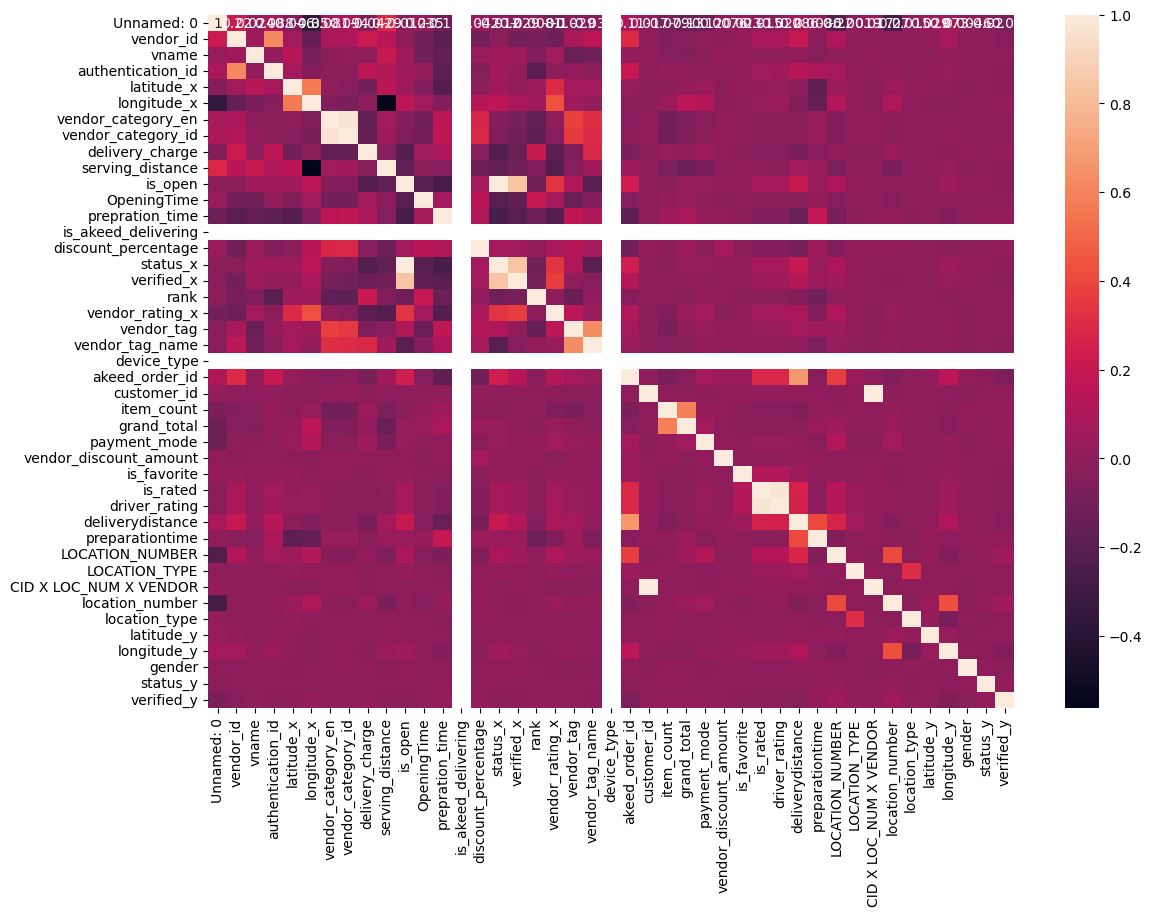

In [177]:
plt.figure(figsize=(13,9))
sns.heatmap(akeed.corr(),annot=True)

In [178]:
akeed.columns

Index(['Unnamed: 0', 'vendor_id', 'vname', 'authentication_id', 'latitude_x',
       'longitude_x', 'vendor_category_en', 'vendor_category_id',
       'delivery_charge', 'serving_distance', 'is_open', 'OpeningTime',
       'prepration_time', 'is_akeed_delivering', 'discount_percentage',
       'status_x', 'verified_x', 'rank', 'vendor_rating_x', 'vendor_tag',
       'vendor_tag_name', 'device_type', 'akeed_order_id', 'customer_id',
       'item_count', 'grand_total', 'payment_mode', 'vendor_discount_amount',
       'is_favorite', 'is_rated', 'driver_rating', 'deliverydistance',
       'preparationtime', 'LOCATION_NUMBER', 'LOCATION_TYPE',
       'CID X LOC_NUM X VENDOR', 'location_number', 'location_type',
       'latitude_y', 'longitude_y', 'gender', 'status_y', 'verified_y'],
      dtype='object')

In [179]:
X_feat=akeed[['latitude_x', 'longitude_x','vname',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'prepration_time',
       'is_akeed_delivering', 'discount_percentage',
       'rank', 'vendor_rating_x', 'vendor_tag', 'vendor_tag_name',
       'device_type', 'akeed_order_id', 'customer_id', 'item_count',
       'grand_total', 'payment_mode', 'vendor_discount_amount', 'is_favorite',
       'is_rated', 'driver_rating', 'deliverydistance', 'preparationtime',
       'LOCATION_NUMBER', 'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR',
       'location_number', 'location_type', 'latitude_y', 'longitude_y',
       'gender']]

In [180]:
y=akeed[['vendor_id']]

In [181]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [182]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [183]:
feat= SequentialFeatureSelector(lm, k_features='best', forward=True, n_jobs=-1)
feat.fit(X_feat,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 36),
                          n_jobs=-1, scoring='r2')

In [184]:
feature=list(feat.k_feature_names_)
feature

['latitude_x',
 'longitude_x',
 'vendor_category_id',
 'delivery_charge',
 'prepration_time',
 'discount_percentage',
 'rank',
 'vendor_rating_x',
 'device_type',
 'akeed_order_id',
 'item_count',
 'grand_total',
 'vendor_discount_amount',
 'is_rated',
 'driver_rating',
 'latitude_y']

In [185]:
x=akeed[['vendor_category_en',
 'delivery_charge',
'serving_distance',
'is_open',
 'prepration_time',
 'discount_percentage',
 'rank',
 'vendor_rating_x',
 'item_count',
 'grand_total',
 'payment_mode',
 'vendor_discount_amount',
 'is_rated',
 'driver_rating',
 'deliverydistance',
 'location_number'
 ]]

In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_normalize = pd.DataFrame(X_scaled, columns=x.columns)

In [187]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.1, random_state=42)

In [190]:
y

,vendor_id
0,4
1,4
2,4
3,4
4,188
...,...
361429,681
361430,681
361431,681
361432,681


In [191]:
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [192]:
prediction=lr.predict_proba(X_test)
prediction

array([[1.11779124e-14, 1.84583660e-02, 2.31171904e-21, ...,
        1.92808998e-05, 6.58391744e-13, 6.01922502e-07],
       [2.39332471e-15, 1.86191623e-08, 2.72043591e-22, ...,
        5.25929495e-02, 8.18270887e-10, 1.76935264e-02],
       [1.64246089e-14, 4.11481503e-03, 1.12504708e-20, ...,
        5.45326465e-06, 7.37768700e-13, 9.59460547e-08],
       ...,
       [4.65896979e-21, 4.07844645e-16, 6.99820087e-25, ...,
        3.71736926e-03, 1.20573247e-10, 5.21416138e-03],
       [1.56252417e-17, 1.15300267e-19, 4.94683294e-26, ...,
        5.75704865e-03, 4.95141878e-09, 4.55553049e-03],
       [5.16161371e-06, 7.09390046e-25, 6.71517775e-18, ...,
        1.08643563e-07, 2.79800591e-17, 1.80228868e-08]])

In [193]:
dtc = DecisionTreeClassifier()

In [194]:

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))

Accuracy with Decision Tree: 98.49%


In [195]:
y_pred

array([271, 547,  33, ...,  76, 299, 356])

In [196]:
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, y_pred)
matrix_confusion

array([[783,   0,   0, ...,   0,   0,   0],
       [  0, 312,   0, ...,   0,   0,   0],
       [  0,   0, 669, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 165,   0,   0],
       [  0,   0,   0, ...,   0, 333,   0],
       [  0,   0,   0, ...,   0,   0, 242]])

<Axes: >

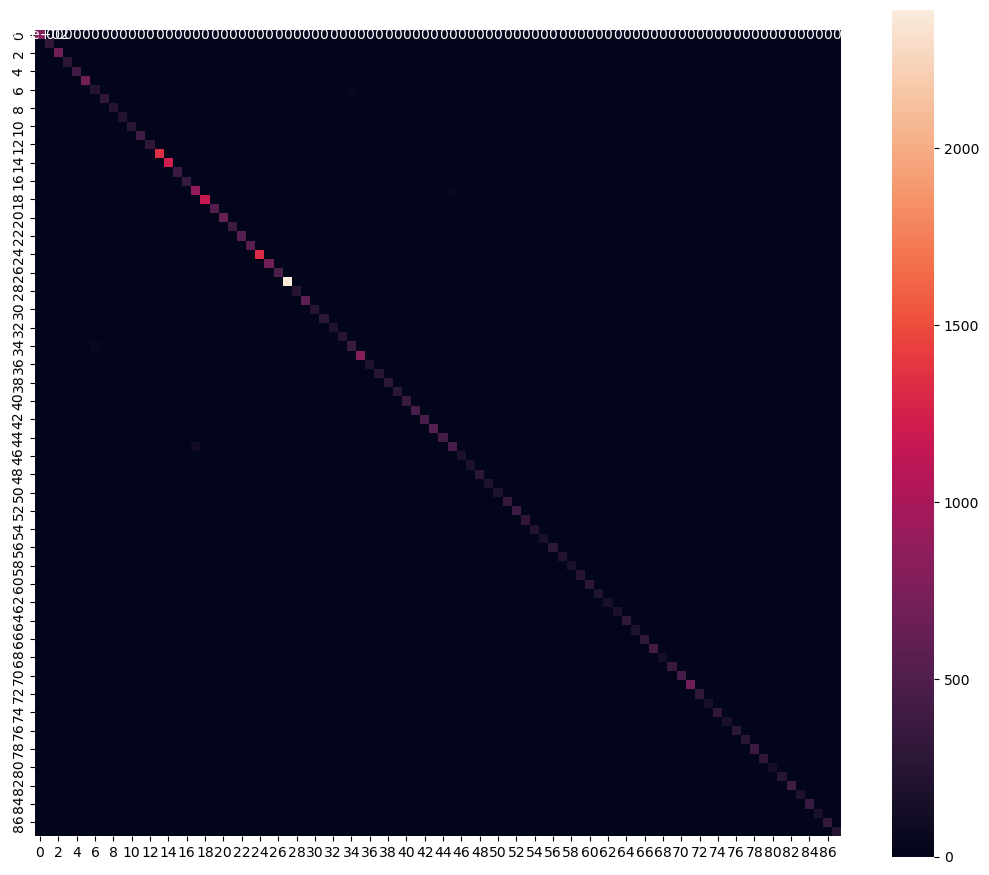

In [197]:
plt.figure(figsize=(13,11))
sns.heatmap(matrix_confusion, square=True, annot=True)

In [198]:
matrix_confusion

array([[783,   0,   0, ...,   0,   0,   0],
       [  0, 312,   0, ...,   0,   0,   0],
       [  0,   0, 669, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 165,   0,   0],
       [  0,   0,   0, ...,   0, 333,   0],
       [  0,   0,   0, ...,   0,   0, 242]])

In [199]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       783
          13       1.00      1.00      1.00       312
          20       1.00      1.00      1.00       669
          23       1.00      1.00      1.00       271
          28       0.96      0.97      0.96       432
          33       1.00      1.00      1.00       686
          43       0.81      0.84      0.82       277
          44       0.93      0.97      0.95       322
          55       1.00      1.00      1.00       231
          66       1.00      1.00      1.00       209
          67       0.97      0.98      0.98       266
          75       1.00      1.00      1.00       403
          76       1.00      1.00      1.00       292
          78       1.00      1.00      1.00      1342
          79       1.00      1.00      1.00      1225
          81       1.00      1.00      1.00       367
          82       1.00      1.00      1.00       342
          83       0.86    

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
rfc=RandomForestClassifier()

In [202]:
rfc.fit(X_train,y_train)

/var/folders/59/nzz8v2013tsby595_yj460fr0000gn/T/ipykernel_6549/3302021315.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier()

In [203]:
pred=rfc.predict(X_test)
pred

array([271, 547,  33, ...,  76, 299, 356])

In [204]:
accuracy = metrics.accuracy_score(pred, y_test) * 100
print("Accuracy Random Forest: {0:.2f}%".format(accuracy))

Accuracy Random Forest: 97.96%


In [205]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       783
          13       1.00      1.00      1.00       312
          20       1.00      1.00      1.00       669
          23       1.00      1.00      1.00       271
          28       0.95      0.95      0.95       432
          33       1.00      1.00      1.00       686
          43       0.79      0.78      0.79       277
          44       0.89      0.93      0.91       322
          55       1.00      1.00      1.00       231
          66       1.00      1.00      1.00       209
          67       0.97      0.93      0.95       266
          75       1.00      1.00      1.00       403
          76       1.00      1.00      1.00       292
          78       1.00      1.00      1.00      1342
          79       1.00      1.00      1.00      1225
          81       1.00      1.00      1.00       367
          82       1.00      1.00      1.00       342
          83       0.85    

In [206]:
import pickle

In [207]:
model_save_path = "vendors.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rfc,file)

In [208]:
model_load_path = "vendors.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model=pickle.load(file)

In [209]:
pred=unpickled_model.predict(X_test)
pred

array([271, 547,  33, ...,  76, 299, 356])

In [210]:
test=pd.read_csv("/Users/da-m1-09/Akeed Restaurant/Final_akeed.csv")
test

,Unnamed: 0,vendor_id,vname,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,is_akeed_delivering,discount_percentage,status_x,verified_x,rank,vendor_rating_x,vendor_tag,vendor_tag_name,device_type,akeed_order_id,customer_id,item_count,grand_total,payment_mode,vendor_discount_amount,is_favorite,is_rated,driver_rating,deliverydistance,preparationtime,created_at_y,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR,location_number,location_type,latitude_y,longitude_y,gender,status_y,verified_y
0,0,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,163267.0,TBOTOCJ,1.0,7.3,1,0.0,No,No,0.0,0.00,44.010993,2019-08-01 06:11:15,0,Home,TBOTOCJ X 0 X 4,0,Home,-0.603303,-78.519610,male,1,1
1,1,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,163267.0,TBOTOCJ,1.0,7.3,1,0.0,No,No,0.0,0.00,44.010993,2019-08-01 06:11:15,0,Home,TBOTOCJ X 0 X 4,1,Home,-0.603823,0.752779,male,1,1
2,2,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,124595.0,TBOTOCJ,1.0,15.5,1,0.0,No,No,0.0,0.00,44.010993,2019-06-01 13:57:14,0,Home,TBOTOCJ X 0 X 4,0,Home,-0.603303,-78.519610,male,1,1
3,3,4,Skaboo,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,15,Yes,0,1,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",3,124595.0,TBOTOCJ,1.0,15.5,1,0.0,No,No,0.0,0.00,44.010993,2019-06-01 13:57:14,0,Home,TBOTOCJ X 0 X 4,1,Home,-0.603823,0.752779,male,1,1
4,4,188,Avaveo,118786,-0.405660,0.644401,Restaurants,2,0.7,8,1,11:59AM-10:45PM,14,Yes,0,1,1,11,4.6,"34,27,15,24,16","Italian,Pasta,Pizzas,Salads,Sandwiches",3,124974.0,TBOTOCJ,1.0,13.0,1,0.0,No,No,0.0,0.00,44.010993,2019-06-02 17:07:56,0,Home,TBOTOCJ X 0 X 188,0,Home,-0.603303,-78.519610,male,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361429,381994,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,411899.0,BGUXDWX,7.0,55.5,2,0.0,No,No,0.0,7.35,45.000000,2020-02-28 13:57:28,0,Home,BGUXDWX X 0 X 681,0,Home,0.182037,0.050900,female,1,1
361430,381995,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,411910.0,VUBOW8L,1.0,8.4,1,0.0,No,No,0.0,10.34,40.000000,2020-02-28 14:04:50,0,Home,VUBOW8L X 0 X 681,0,Home,-1.524390,-0.024741,male,1,0
361431,381996,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,412059.0,N5MKYBU,1.0,8.4,1,0.0,No,No,0.0,1.93,30.000000,2020-02-28 15:11:59,0,Home,N5MKYBU X 0 X 681,0,Home,-0.540456,0.059288,male,1,1
361432,381997,681,Browsezoom,124250,-0.595325,0.095639,Restaurants,2,0.7,15,1,22-Sep,10,Yes,0,1,1,11,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",3,413226.0,2UYA2WP,3.0,12.8,1,0.0,No,Yes,2.0,6.80,40.000000,2020-02-28 22:39:58,0,Home,2UYA2WP X 0 X 681,0,Home,-0.557269,0.172343,male,1,1


In [211]:
d=test.groupby('vendor_id')['vname'].unique()
e=pd.DataFrame(d)
e.to_csv('/Users/da-m1-09/Downloads/rest_name.csv')

In [212]:
test['is_rated'].value_counts()

is_rated
No     309877
Yes     51557
Name: count, dtype: int64

In [213]:
akeed['is_rated'].isnull().sum()

0

In [214]:
akeed.isnull().sum().tail(30)

is_akeed_delivering       0
discount_percentage       0
status_x                  0
verified_x                0
rank                      0
vendor_rating_x           0
vendor_tag                0
vendor_tag_name           0
device_type               0
akeed_order_id            0
customer_id               0
item_count                0
grand_total               0
payment_mode              0
vendor_discount_amount    0
is_favorite               0
is_rated                  0
driver_rating             0
deliverydistance          0
preparationtime           0
LOCATION_NUMBER           0
LOCATION_TYPE             0
CID X LOC_NUM X VENDOR    0
location_number           0
location_type             0
latitude_y                0
longitude_y               0
gender                    0
status_y                  0
verified_y                0
dtype: int64

In [215]:
y

,vendor_id
0,4
1,4
2,4
3,4
4,188
...,...
361429,681
361430,681
361431,681
361432,681


In [216]:
xgb_model=XGBClassifier()


In [217]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [218]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [219]:
pre=xgb_model.predict(X_test)

In [220]:
accurant=accuracy_score(y_test,pre)
accurant

0.746541611332448

In [221]:
f1=f1_score(y_test,pre,average='weighted')
f1

0.6727705173724244

In [222]:
model_save_path = "vendorsxgb.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rfc,file)

In [223]:
model_load_path = "vendorsxgb.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model=pickle.load(file)

In [224]:
akeed.isnull().sum()

Unnamed: 0                0
vendor_id                 0
vname                     0
authentication_id         0
latitude_x                0
longitude_x               0
vendor_category_en        0
vendor_category_id        0
delivery_charge           0
serving_distance          0
is_open                   0
OpeningTime               0
prepration_time           0
is_akeed_delivering       0
discount_percentage       0
status_x                  0
verified_x                0
rank                      0
vendor_rating_x           0
vendor_tag                0
vendor_tag_name           0
device_type               0
akeed_order_id            0
customer_id               0
item_count                0
grand_total               0
payment_mode              0
vendor_discount_amount    0
is_favorite               0
is_rated                  0
driver_rating             0
deliverydistance          0
preparationtime           0
LOCATION_NUMBER           0
LOCATION_TYPE             0
CID X LOC_NUM X VEND

In [227]:
x.prepration_time.value_counts()

prepration_time
15    120795
10     82271
14     32791
17     27948
13     22478
12     16096
11     14903
16     13236
18      9076
19      8994
20      5170
21      2900
5       2435
45      2341
Name: count, dtype: int64